# Political parties and policy outcomes

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

df = pd.read_csv('governors.csv')


## Explorative data analysis

In [3]:
df.describe()

,Unnamed: 0,dem_governor,dem_majority_house,dem_majority_senate,dem_margin,year,unemployment,murder,income_top_one_pct,house_prices
count,864.000000,861.000000,746.000000,746.000000,825.000000,864.000000,400.000000,775.000000,779.000000,471.000000
mean,1573.255787,0.544715,0.628686,0.604558,0.020541,1986.533565,5.956250,5.699613,12.786618,1.949188
std,889.024071,0.498286,0.483480,0.489274,0.207804,18.333180,2.003734,3.577288,4.711669,1.099159
min,1.000000,0.000000,0.000000,0.000000,-0.500000,1959.000000,2.300000,0.200000,4.013025,0.518150
25%,827.000000,0.000000,0.000000,0.000000,-0.100600,1970.000000,4.475000,2.800000,9.380197,1.100900
50%,1625.000000,1.000000,1.000000,1.000000,0.009000,1986.000000,5.700000,5.100000,11.597607,1.688325
75%,2358.500000,1.000000,1.000000,1.000000,0.139000,2002.000000,7.200000,7.900000,15.211016,2.458125
max,3059.000000,1.000000,1.000000,1.000000,0.500000,2017.000000,13.900000,20.299999,34.422260,6.598275


#### Pairplot visualisation 

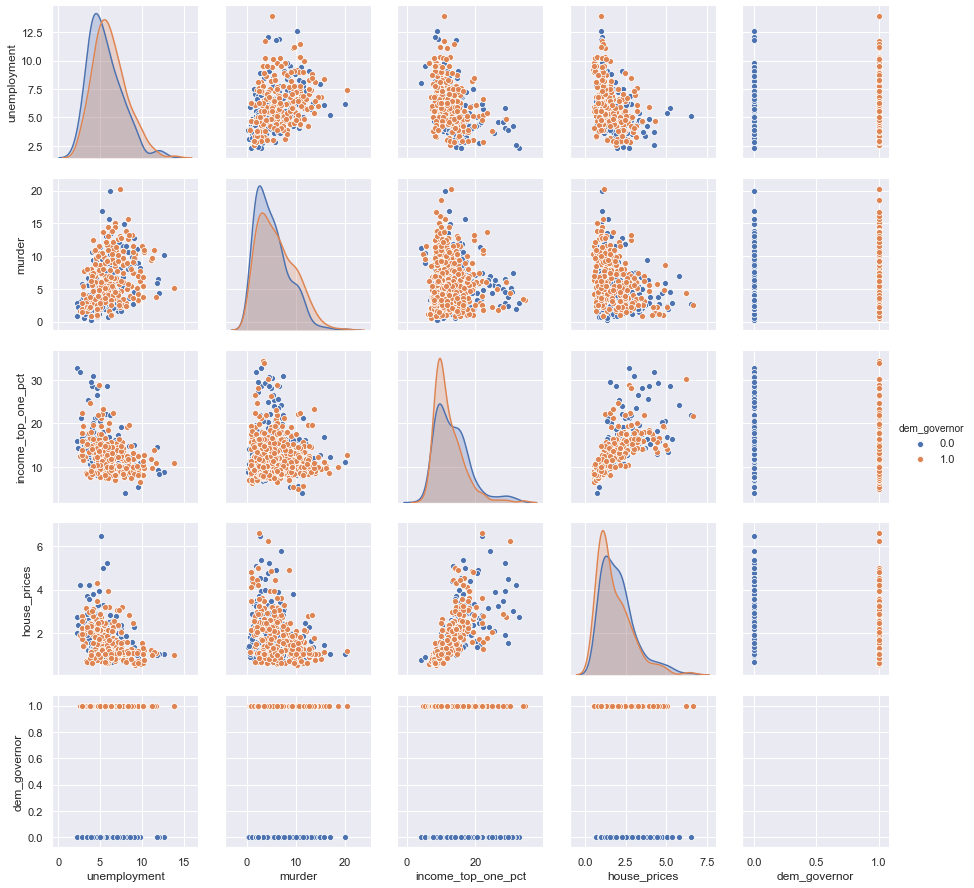

In [10]:
#investigate how values vary wrt one another
X = df[['unemployment', 'murder', 'income_top_one_pct', 'house_prices','dem_governor']]
sns.pairplot(X, hue = 'dem_governor')

#### Creating function to speed up the Linear regression process 

In [4]:
def LRstats(x,y, dataframe):
    
    dfi = dataframe[[ x, y ]]
    dfi = dfi.dropna()
    xvariable = dfi[x]
    yvariable = dfi[y]
    
    X = sm.add_constant(xvariable)
    results = sm.OLS(yvariable , X).fit()
    
    print('Rsquared:' , results.rsquared)
    print('Coeff:' , results.params[1])
    print('P-value:' , results.pvalues[1])
    
 

#### The actual Regression 

In [123]:
LRstats( 'dem_governor' , 'murder' , df)

Rsquared: 0.018736000159162325
Coeff: 0.9831325572914582
P-value: 0.0001361888652157225


In [76]:
LRstats( 'dem_governor' , 'house_prices' , df)

Rsquared: 0.013640575658192766
Coeff: -0.2511781999748482
P-value: 0.011454515903142242


In [77]:
LRstats( 'dem_governor' , 'income_top_one_pct' , df)

Rsquared: 0.017599147186379227
Coeff: -1.2482662823001391
P-value: 0.00021058826647124307


In [78]:
LRstats( 'dem_governor' , 'unemployment' , df)

Rsquared: 0.02232972224164176
Coeff: 0.5995628666055944
P-value: 0.002734450426312623


## Multiple Linear Regression 

#### Creating MLR function#

In [44]:
def MLRstats(a,b,c ,dataframe):
    yi = ['murder','unemployment','house_prices','income_top_one_pct']
    yi = np.array(yi)
    dem_gov_coeff = []
    dem_maj_House = []
    dem_maj_Senate = []
    rsquared = []
    
    
    for i in yi:
        dfi = dataframe[[ i, a, b, c ]]
        dfi = dfi.dropna()
        xvariable = dfi[[a,b,c]]
        yvariable = dfi[i]
    
        X = sm.add_constant(xvariable)
        results = sm.OLS(yvariable , X).fit()
        dem_gov_coeff.append(results.params[1])
        dem_maj_House.append(results.params[2])
        dem_maj_Senate.append(results.params[3])
        rsquared.append(results.rsquared)
        
     
    dem_gov_coeff = np.array(dem_gov_coeff)
    rsquared = np.array(rsquared)
    dem_maj_House = np.array(dem_maj_House)
    dem_maj_Senate = np.array(dem_maj_Senate)
    
    newdf = pd.DataFrame({'dem_gov': np.around(dem_gov_coeff), 'rsq': np.around(rsquared)
                            , 'dem majH': np.around(dem_maj_House), 'dem majS': np.around(dem_maj_Senate)}
                         , columns = ['dem_gov', 'rsq','demH','demS']
                         , index = ['murder', 'unemployment', 'house_prices','income_top_one_pct'] )
    print(newdf)



#### The actual MLR

In [45]:
MLRstats('dem_governor','dem_majority_house','dem_majority_senate', df)

                    dem_gov  rsq demH demS
murder                  0.0  0.0  NaN  NaN
unemployment            0.0  0.0  NaN  NaN
house_prices           -0.0  0.0  NaN  NaN
income_top_one_pct     -1.0  0.0  NaN  NaN


In [96]:
MLRstats('unemployment','dem_governor','dem_majority_house','dem_majority_senate', df)

Rsquared: 0.08031796496017762
Coeff dem_governor : 0.42968619575863826
Coeff dem_majority_house : 0.9054691633870583
Coeff dem_majority_senate : 0.17471745153545004


In [97]:
MLRstats('house_prices','dem_governor','dem_majority_house','dem_majority_senate', df)

Rsquared: 0.016963888138304628
Coeff dem_governor : -0.23505133244018678
Coeff dem_majority_house : 0.060273074774217714
Coeff dem_majority_senate : -0.1654358400328886


In [98]:
MLRstats('income_top_one_pct','dem_governor','dem_majority_house','dem_majority_senate', df)

Rsquared: 0.02960386916336033
Coeff dem_governor : -1.206419050272589
Coeff dem_majority_house : 1.2193347733022781
Coeff dem_majority_senate : -1.4302063661014564


In [10]:
coeffgov = [ 0.4297, 0.3859 ,-1.2064 , -0.2351 ]
coeffHouse = [ 0.9055, 2.2720 ,1.2193 , 0.0603]
coeffSenate = [0.1747, 0.8298 ,-1.4302 , -0.1654]
intercept1 = [ 5.0739,3.6383 , 13.4572 , 2.1259]
rsquared1 = [ 0.080 , .163, 0.030, 0.017 ]
ajrsquared = [0.073,0.159 , 0.026, 0.010 ]

dict = {
    'coeff Gov' :coeffgov ,
    'coeff House' : coeffHouse,
    'coeff Senate' : coeffSenate,
    'intercept' : intercept1,
    'rsquared' : rsquared1,
    'adjusted rsqrd' : ajrsquared
}

dftable1 = pd.DataFrame(dict, index = ['unemployment' , 'murder' , 'income' , 'houseprices'])

dftable1

,coeff Gov,coeff House,coeff Senate,intercept,rsquared,adjusted rsqrd
unemployment,0.4297,0.9055,0.1747,5.0739,0.080,0.073
murder,0.3859,2.2720,0.8298,3.6383,0.163,0.159
income,-1.2064,1.2193,-1.4302,13.4572,0.030,0.026
houseprices,-0.2351,0.0603,-0.1654,2.1259,0.017,0.010


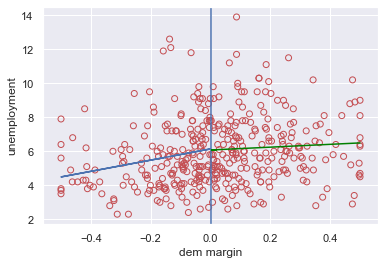

In [34]:
#RDD

dfRDDu = df[['unemployment', 'dem_margin']]
dfRDDu = dfRDDu.dropna()

unemployRDD = dfRDDu['unemployment']
marginRDD = dfRDDu['dem_margin']


xeq = marginRDD[marginRDD > 0]
yeq = 0.8328 * xeq + 6.0759
b, meq = polyfit(xeq, yeq, 1)

xeq1 = marginRDD[marginRDD < 0]
yeq1 = 3.2978 * xeq1 + 6.1397
b1, meq1 = polyfit(xeq1, yeq1, 1)



plt.scatter(marginRDD, unemployRDD, facecolors = 'none', edgecolors = 'r')
plt.axvline(x=0)
plt.xlabel('dem margin')
plt.ylabel('unemployment')

plt.plot(xeq, b+ meq*xeq, c= 'green')
plt.plot(xeq1, b1+ meq1*xeq1, c= 'b')

7A.	By simply comparing whether states have Democratic or Republican governor, we are subject to issues of confounding. We do not know how much the variation can be explained by other factors and in this study, we do not have all the possible confounders such as, individual state/county economy, education level and public opinion to be able to estimate causal effects of party and policy outcomes. A regression discontinuity design has high internal validity meaning despite not having all the confounders, we can still estimate causal effects. This is extremely important in an experiment like this since policy outcomes are likely to involve many confounders that are difficult to collect data on and control due to the political nature of them.

However, the issue of confounding variables not controlled for will work against the statistical significance of the causal effect estimate. As seen in table 4 the variation in the data is barely explained by any of the models meaning there are better predictors that aren't in the data.

B.  The regression discontinuity design estimate for the unemployment rate is -0.064 showing that there is very little causal effect for unemployment when measured against dem_margin. 

The regression discontinuity design estimate for murder shows that at the discontinuity murder drops by 0.3, meaning when a democrat wins the murder rate drops by 0.3. In terms of substantive significance this drop relative to the maximum murder rate is miniscule and doesn't exhibit a meaningful causal effect at the discontinuity.

The regression discontinuity design estimate for pct_income is -0.12, implying that when a Democrat wins the pct_income held by the top 1 percent reduces by 0.12%

The regression discontinuity design estimate for the house price index rate is -0.14, implying that when a Democrat wins house price index reduces by 0.14.

D.  For unemployment the RDD showed a decrease in unemployment when a democrat won. The relationship illustrated by both linear regression model 1 and multiple linear regression model 1 where unemployment rate increases with 0.6


In [13]:

def plshelp(x,y, dataframe):
    dataframe = dataframe[[ x , y ]]
    dataframe = dataframe.dropna()
    xvariable = dataframe[x]
    yvariable = dataframe[y]
    
    X = sm.add_constant(xvariable)
    results = sm.OLS(yvariable , X).fit()
    
    return results.rsquared


In [ ]:

#MLR df
dfmurder = df[['dem_governor' , 'murder' , 'dem_majority_house', 'dem_majority_senate']]
dfunemploy = df[['dem_governor' , 'unemployment' , 'dem_majority_house', 'dem_majority_senate']]
dfincome = df[['dem_governor' , 'income_top_one_pct' , 'dem_majority_house', 'dem_majority_senate']]
dfhouseprices = df[['dem_governor' , 'house_prices' , 'dem_majority_house', 'dem_majority_senate']]

#MLR data cleaning
dfmurder = dfmurder.dropna()
dfunemploy = dfunemploy.dropna()
dfincome = dfincome.dropna()
dfhouseprices = dfhouseprices.dropna()


#MLR variables
#Model1
yu = dfunemploy['unemployment']
govm1 = dfunemploy[['dem_governor', 'dem_majority_house' ,'dem_majority_senate' ]]
govmx1 = sm.add_constant(govm1)
results1 = sm.OLS(yu , govmx1).fit()

#Model2
ym = dfmurder['murder']
govm2 = dfmurder[['dem_governor', 'dem_majority_house' ,'dem_majority_senate' ]]
govmx2 = sm.add_constant(govm2)
result2 = sm.OLS(ym , govmx2).fit()


#Model3
yi = dfincome['income_top_one_pct']
govm3 = dfincome[['dem_governor', 'dem_majority_house' ,'dem_majority_senate' ]]
govmx3 = sm.add_constant(govm3)
results3 = sm.OLS(yi , govmx3).fit()

#Model4
yh = dfhouseprices['house_prices']
govm4 = dfhouseprices[['dem_governor', 'dem_majority_house' ,'dem_majority_senate' ]]
govmx4 = sm.add_constant(govm4)
results4 = sm.OLS(yh , govmx4).fit()

In [ ]:
plshelp(df[])